In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import matplotlib


/data/keeling/a/jdnied2/miniconda3/envs/Mapping/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
# %matplotlib notebook 
font = {
        'size'   : 18
}
matplotlib.rc('font', **font)

In [3]:
files_gewex_2024 = ['CA_ISCCP_HGG_0130PM_2007.nc',
                    'CA_PATMOSX_NOAA_0130PM_2007.nc',
                    'CA_AVHRR-CLARA_A2_NOAA_0130AMPM_2007.nc',
                    'CA_AVHRR-ESACCI_NOAA_0130AMPM_2007.nc',
                    'CA_MODIS-CLDPROP_AQU_0130PM_2007.nc',
                    'CA_MODIS-CE_AQU_0130PM_2007.nc',
                    'CA_MISR_TER_10AM_2007.nc', 
                    'CA_MISR_RC_TER_10AM_2007.nc'
                   ]
files_gewex_2013 = ['CA_ISCCP_D1_AMPM_2007.nc',
                    'CA_PATMOSX_NOAA_0130PM_2007.nc',
                    'CA_MODIS-ST_AQU_0130PM_2007.nc',
                    'CA_MODIS-ST_TER_1030AM_2007.nc',
                    'CA_MODIS-CE_AQU_0130PM_2007.nc',
                    'CA_MODIS-CE_TER_1030AM_2007.nc',
                    'CA_POLDER_PARASOL_0130PM_2007.nc',
                    'CA_MISR_TER_10AM_2007.nc'
                    ]

/data/keeling/a/jdnied2/miniconda3/envs/Mapping/lib/python3.12/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'a_CA' has multiple fill values {-999.0, -777.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/data/keeling/a/jdnied2/miniconda3/envs/Mapping/lib/python3.12/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'n_tot' has multiple fill values {-999.0, -777.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/data/keeling/a/jdnied2/miniconda3/envs/Mapping/lib/python3.12/site-packages/xarray/conventions.py:286: SerializationWarning: variable 's_CA' has multiple fill values {-999.0, -777.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/data/keeling/a/jdnied2/miniconda3/envs/Mapping/lib/python3.12/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'a_CA' has multiple fill values {-999.0, -777.0} defined, decoding all values to NaN.
  va

MONTH: 8 -  -0.0009076044079809886
0.6700274963212988
0.6691198919133178


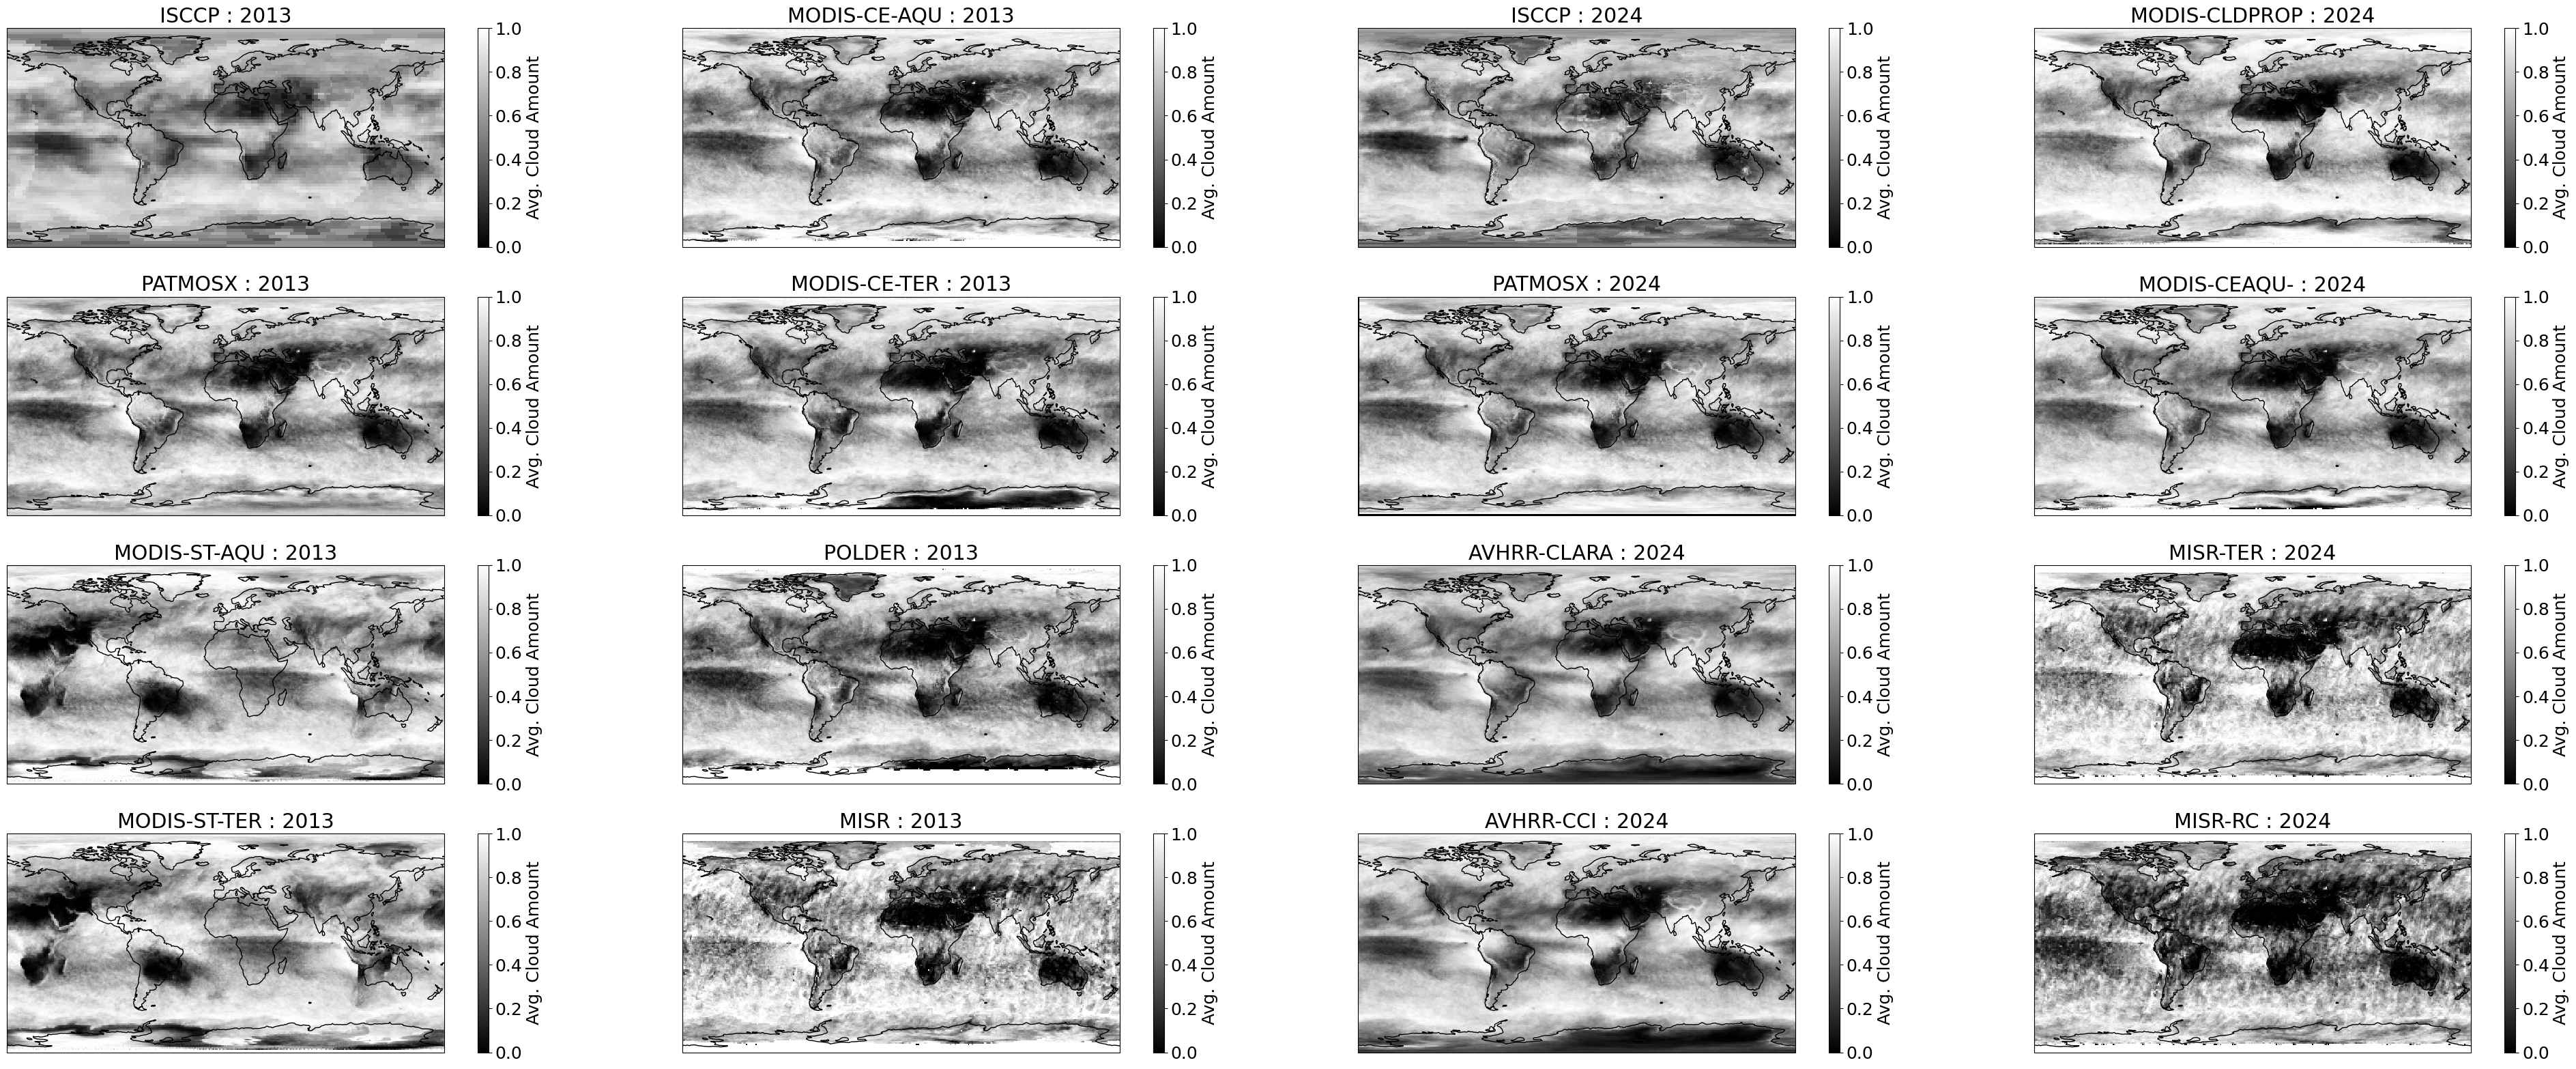

In [4]:
fig, axes = plt.subplots(4, 4, figsize=(40, 16), 
                       sharex=True, sharey=True,
                       subplot_kw={'projection': ccrs.PlateCarree()})
stack = np.zeros((8,180,360))
stack_13 = np.zeros((8,180,360))

# mean_diffs = []

MONTH = 8 # aug
# for MONTH in range(12):
avgs_13_aug = []
avgs_24_aug = []

names = []

#2013
for i, fname in enumerate(files_gewex_2013):
    ds_i = xr.open_dataset(f'/data/keeling/a/jdnied2/c/GEWEX/2013/{fname}', 
                     decode_times=False)
    if i > 3:
        x = i-4
        y = 1
    else:
        x = i
        y = 0


    dataset_name = fname.split('_')[1]
    if dataset_name == 'MODIS-ST' or dataset_name == 'MODIS-CE':
        dataset_name += '-'+fname.split('_')[2]
    dataset_name += ' : 2013'
    names.append(dataset_name)

    if dataset_name[0:8] == 'MODIS-ST':
        ds_i.isel(month=MONTH).a_CA.plot(
            ax=axes[x,y], transform=ccrs.PlateCarree(), cmap='gray', 
            vmin=0.0, vmax=1.0,
            extend = 'neither',
            cbar_kwargs={'label': "Avg. Cloud Amount"}
        )
    else:
        ds_i.isel(time=MONTH).a_CA.plot(
            ax=axes[x,y], transform=ccrs.PlateCarree(), cmap='gray', 
            vmin=0.0, vmax=1.0,
            extend = 'neither',
            cbar_kwargs={'label': "Avg. Cloud Amount"}
        )

    axes[x,y].coastlines()
    axes[x,y].set_title(dataset_name)

    if dataset_name[0:8] == 'MODIS-ST':
        ds_i_np = ds_i.isel(month=MONTH).a_CA.to_numpy()
    else:
        ds_i_np = ds_i.isel(time=MONTH).a_CA.to_numpy()

    ds_i_np[ds_i_np==-999] = np.nan
    ds_i_np[ds_i_np>1] = 1
    stack_13[i] = ds_i_np

    avgs_13_aug.append(np.nanmean(ds_i_np))

#2024
for i, fname in enumerate(files_gewex_2024):
    ds_i = xr.open_dataset(f'/data/keeling/a/jdnied2/c/GEWEX/2024/{fname}', 
                     decode_times=False)

    if i > 3:
        x = i - 4
        y = 3
    else:
        x = i
        y = 2
    dataset_name = fname.split('_')[1]
    if dataset_name == 'MISR':
        dataset_name += '-'+fname.split('_')[2]
    elif dataset_name =='MODIS-CE':
        dataset_name += 'AQU-'
    elif dataset_name =='AVHRR-ESACCI':
        dataset_name = 'AVHRR-CCI'
    dataset_name += ' : 2024'

    names.append(dataset_name)

    ds_i.isel(time=MONTH).a_CA.plot(
        ax=axes[x,y], transform=ccrs.PlateCarree(), cmap='gray', 
        vmin=0.0, vmax=1.0,
        extend = 'neither',
        cbar_kwargs={'label': "Avg. Cloud Amount"}
    )
    axes[x,y].coastlines()
    axes[x,y].set_title(dataset_name)

    ds_i_np = ds_i.isel(time=MONTH).a_CA.to_numpy()
    ds_i_np[ds_i_np==-999] = np.nan
    ds_i_np[ds_i_np>1] = 1
    stack[i] = ds_i_np

    avgs_24_aug.append(np.nanmean(ds_i_np))



# p.axes.set_global()

# p.axes.coastlines()
plt.tight_layout()
print(f"MONTH: {MONTH} - ",np.nanmean(avgs_13_aug)-np.nanmean(avgs_24_aug[:-1]))
print(np.nanmean(avgs_24_aug[:-1]))
print(np.nanmean(avgs_13_aug))
# mean_diffs.append(np.nanmean(avgs_13)-np.nanmean(avgs_24[:-1]))
#     print()
# plt.savefig('/data/keeling/a/jdnied2/c/GEWEX/datasets.png')
plt.show()

In [5]:
np.mean(avgs_24_aug[:-1])

0.6700274963212988

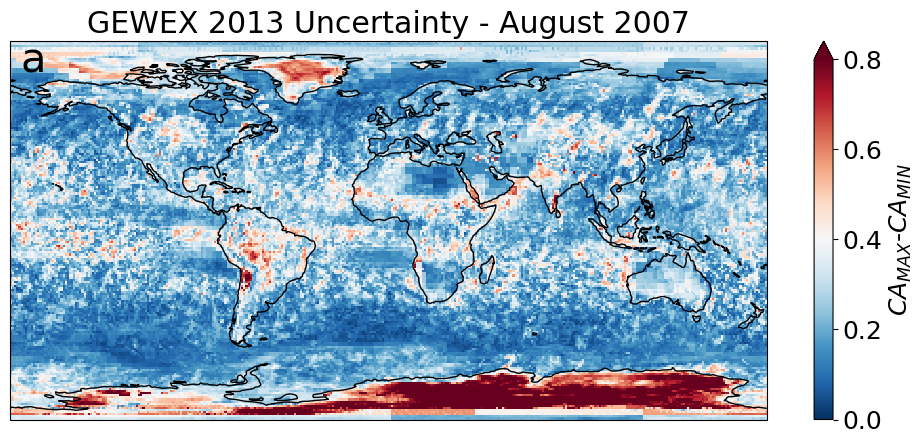

In [6]:
max_min = np.zeros((180,360))
select = [0,1,2,3,4,5,6,7]
for x in range(stack.shape[1]):
    for y in range(stack.shape[2]):
        val = stack_13[:,x,y]
        max_min[x,y] = np.nanmax(val)-np.nanmin(val)

fig, axes = plt.subplots(1, 1, figsize=(10, 10), 
                       sharex=True, sharey=True,
                       subplot_kw={'projection': ccrs.PlateCarree()})
img =  axes.pcolormesh(ds_i['longitude'], ds_i['latitude'], max_min,
            transform = ccrs.PlateCarree(), vmin=0, vmax=.8, cmap='RdBu_r')
fig.colorbar(img,shrink=0.4, extend='max',pad=0.05, label=r'$CA_{MAX}$-$CA_{MIN}$')
axes.coastlines()
plt.text(-175, 75, 'a', fontsize=30)

plt.plot()
plt.title('GEWEX 2013 Uncertainty - August 2007')
plt.tight_layout()
plt.savefig('/data/keeling/a/jdnied2/c/GEWEX/gewex_aug_13_spread.png')
# plt.clim((0,1))


['CA_MODIS-CLDPROP_AQU_0130PM_2007.nc' 'CA_MISR_TER_10AM_2007.nc']


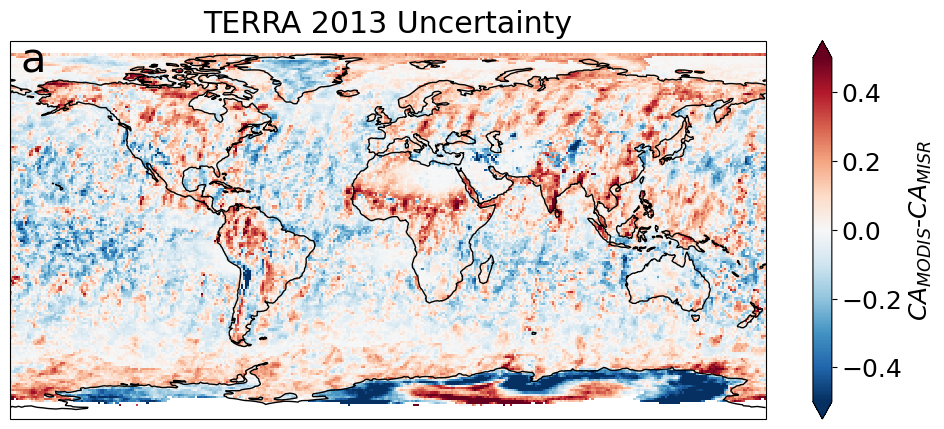

In [7]:
max_min = np.zeros((180,360))
select = [0,1,2,3,4,5,6,7]

mod = stack_13[3,:,:]
misr = stack_13[7,:,:]
print(np.array(files_gewex_2024)[[4,6]])
# diff = np.abs(mod-misr)
diff = mod-misr

fig, axes = plt.subplots(1, 1, figsize=(10, 10), 
                       sharex=True, sharey=True,
                       subplot_kw={'projection': ccrs.PlateCarree()})
img =  axes.pcolormesh(ds_i['longitude'], ds_i['latitude'], diff,
            transform = ccrs.PlateCarree(), vmin=-.5, vmax=.5, cmap='RdBu_r')
fig.colorbar(img,shrink=0.4, extend='both',pad=0.05, label=r'$CA_{MODIS}$-$CA_{MISR}$')
axes.coastlines()
plt.text(-175, 75, 'a', fontsize=30)

plt.plot()
plt.title('TERRA 2013 Uncertainty')
plt.tight_layout()
# plt.savefig('/data/keeling/a/jdnied2/c/GEWEX/terra_24_spread.png')
# plt.clim((0,1))


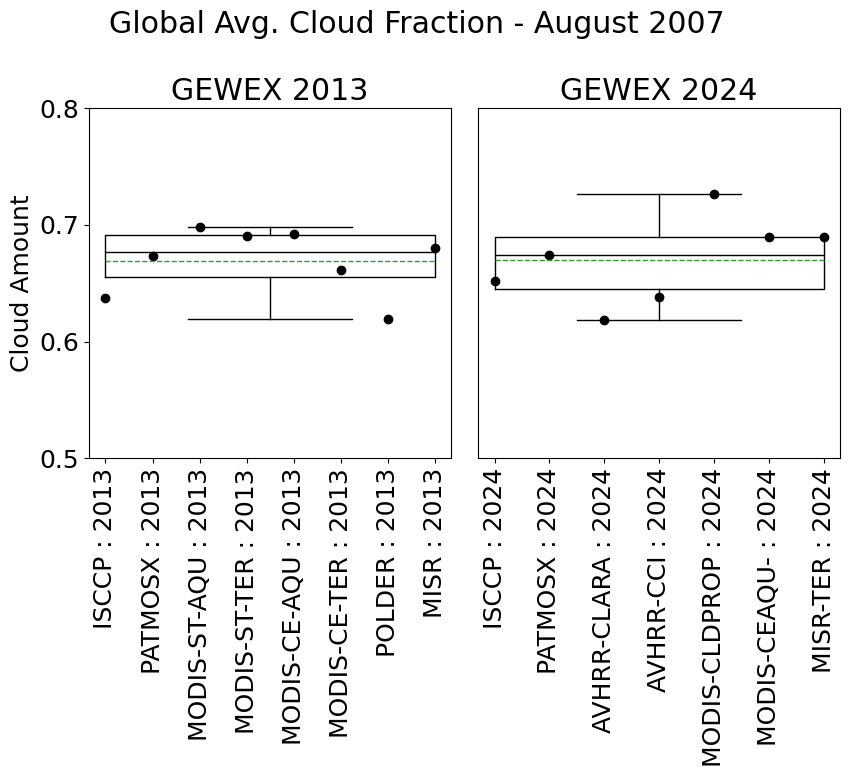

In [9]:
fig, ax = plt.subplots(1,2,figsize=(9,8))
ax[0].boxplot(avgs_13_aug,
            meanline=True, showmeans=True, medianprops={'color': 'black'},
            widths=7,positions=[3.5])
marks = ['s','1','2','3','4','8','.',',']
mark_face= []
for i in range(len(avgs_13_aug)):
    ax[0].scatter(i, avgs_13_aug[i],label=names[i], color='black')
ax[0].set_xticks(range(len(avgs_13_aug)))
ax[0].set_xticklabels(names[:8],rotation=90)
ax[0].set_ylim(0.5,.8)
ax[0].set_ylabel('Cloud Amount')

ax[1].boxplot(avgs_24_aug[:-1],
            meanline=True, showmeans=True, medianprops={'color': 'black'},
            widths=6,positions=[3])
marks = ['s','1','2','3','4','8','.',',']
mark_face= []
for i in range(len(avgs_24_aug[:-1])):
    ax[1].scatter(i, avgs_24_aug[i],label=names[i+8],color='black')
ax[1].set_xticks(range(len(avgs_24_aug[:-1])))
ax[1].set_xticklabels(names[8:-1],rotation=90)
ax[1].set_ylim(0.5,.8)
ax[1].set_yticks([])

# ax[1].set_ylabel('Cloud Amount')
# plt.xlabel('Dataset')
# plt.legend()
ax[0].set_title('GEWEX 2013')
ax[1].set_title('GEWEX 2024')
fig.suptitle('Global Avg. Cloud Fraction - August 2007')
plt.tight_layout()
plt.savefig('/data/keeling/a/jdnied2/c/GEWEX/glob_avg.png')

In [11]:
print(np.median(avgs_13_aug))
print(np.median(avgs_24_aug[:-1]))

0.6770776212215424
0.6746933460235596


In [12]:
stack_24 = np.zeros((8,12,180,360))
stack_13 = np.zeros((8,12,180,360))

# mean_diffs = []

MONTH = 7 # aug
avgs_per_mon_13 = np.zeros((8,12))
avgs_per_mon_24 = np.zeros((8,12))

# for MONTH in range(12):
avgs_13_ann = []
avgs_24_ann = []

names = []

#2013
for i, fname in enumerate(files_gewex_2013):
    ds_i = xr.open_dataset(f'/data/keeling/a/jdnied2/c/GEWEX/2013/{fname}', 
                     decode_times=False)
    if i > 3:
        x = i-4
        y = 1
    else:
        x = i
        y = 0
        
    dataset_name = fname.split('_')[1]
    if dataset_name == 'MODIS-ST' or dataset_name == 'MODIS-CE':
        dataset_name += '-'+fname.split('_')[2]
    dataset_name += ' : 2013'
    names.append(dataset_name)
    for MONTH in range(0,12):

        if dataset_name[0:8] == 'MODIS-ST':
            ds_i_np = ds_i.isel(month=MONTH).a_CA.to_numpy()
        else:
            ds_i_np = ds_i.isel(time=MONTH).a_CA.to_numpy()

        ds_i_np[ds_i_np==-999] = np.nan
        ds_i_np[ds_i_np>1] = 1
        stack_13[i,MONTH] = ds_i_np
        avgs_per_mon_13[i,MONTH] = np.nanmean(stack_13[i,MONTH])
    avgs_13_ann.append(np.nanmean(stack_13[i,:]))
    
    
    
#2024
for i, fname in enumerate(files_gewex_2024):
    ds_i = xr.open_dataset(f'/data/keeling/a/jdnied2/c/GEWEX/2024/{fname}', 
                     decode_times=False)

    if i > 3:
        x = i - 4
        y = 3
    else:
        x = i
        y = 2
    dataset_name = fname.split('_')[1]
    if dataset_name == 'MISR':
        dataset_name += '-'+fname.split('_')[2]
    elif dataset_name =='MODIS-CE':
        dataset_name += 'AQU-'
    elif dataset_name =='AVHRR-ESACCI':
        dataset_name = 'AVHRR-CCI'

    dataset_name += ' : 2024'

    names.append(dataset_name)
    for MONTH in range(0,12):
        ds_i_np = ds_i.isel(time=MONTH).a_CA.to_numpy()
        ds_i_np[ds_i_np==-999] = np.nan
        ds_i_np[ds_i_np>1] = 1
        stack_24[i,MONTH] = ds_i_np
        avgs_per_mon_24[i,MONTH] = np.nanmean(stack_24[i,MONTH])
    avgs_24_ann.append(np.nanmean(stack_24[i,:]))

/data/keeling/a/jdnied2/miniconda3/envs/Mapping/lib/python3.12/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'a_CA' has multiple fill values {-999.0, -777.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/data/keeling/a/jdnied2/miniconda3/envs/Mapping/lib/python3.12/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'n_tot' has multiple fill values {-999.0, -777.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/data/keeling/a/jdnied2/miniconda3/envs/Mapping/lib/python3.12/site-packages/xarray/conventions.py:286: SerializationWarning: variable 's_CA' has multiple fill values {-999.0, -777.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/tmp/ipykernel_174751/2068016791.py:42: RuntimeWarning: Mean of empty slice
  avgs_per_mon_13[i,MONTH] = np.nanmean(stack_13[i,MONTH])
/data/keeling/a/jdnied2/miniconda3/envs/Mapping/lib/python3.12/site-packages/xarray/conven

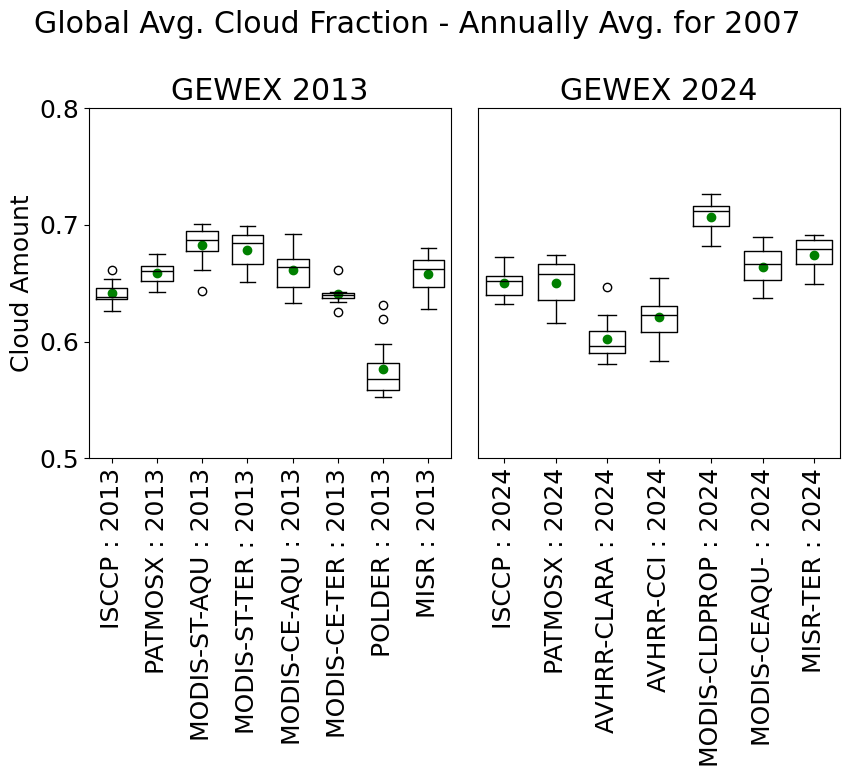

In [13]:
fig, ax = plt.subplots(1,2,figsize=(9,8))

marks = ['s','1','2','3','4','8','.',',']
mark_face= []
for i in range(len(avgs_13_ann)):
    ax[0].scatter(i, avgs_13_ann[i],label=names[i], color='green')
    ax[0].boxplot(avgs_per_mon_13[i][~np.isnan(avgs_per_mon_13[i])],
                  meanline=False, showmeans=False, medianprops={'color': 'black'},
            widths=.7,positions=[i])
    
ax[0].set_xticks(range(len(avgs_13_ann)))
ax[0].set_xticklabels(names[:8],rotation=90)
ax[0].set_ylim(0.5,0.8)
ax[0].set_ylabel('Cloud Amount')


marks = ['s','1','2','3','4','8','.',',']
mark_face= []
for i in range(len(avgs_24_ann[:-1])):
    ax[1].scatter(i, avgs_24_ann[i],label=names[i+8],color='green')
    ax[1].boxplot(avgs_per_mon_24[i,:],
                  meanline=False, showmeans=False, medianprops={'color': 'black'},
            widths=.7,positions=[i])
ax[1].set_xticks(range(len(avgs_24_ann[:-1])))
ax[1].set_xticklabels(names[8:-1],rotation=90)
ax[1].set_ylim(0.5,0.8)
ax[1].set_yticks([])

# ax[1].set_ylabel('Cloud Amount')
# plt.xlabel('Dataset')
# plt.legend()
ax[0].set_title('GEWEX 2013')
ax[1].set_title('GEWEX 2024')
fig.suptitle('Global Avg. Cloud Fraction - Annually Avg. for 2007')
plt.tight_layout()
plt.savefig('/data/keeling/a/jdnied2/c/GEWEX/glob_avg_ann_avg_2007.png')

In [14]:
np.nanmean(np.concatenate((avgs_per_mon_24[:-1])))

0.6528535990519452

In [15]:
np.nanstd(np.concatenate((avgs_per_mon_24[:-1])))

0.03596110771206121

In [16]:
np.nanmean(np.concatenate((avgs_per_mon_13[:])))

0.6502685708716358

In [17]:
np.nanstd(np.concatenate((avgs_per_mon_13[:])))

0.03559294883865783

In [18]:
np.max(avgs_13_ann) - np.min(avgs_13_ann)

0.10592521759076678

In [19]:
np.max(avgs_24_ann[:-1]) - np.min(avgs_24_ann[:-1])

0.10478829955405644

In [21]:
mean_stack_ann_13 = np.zeros((8,180,360))
mean_stack_ann_24 = np.zeros((8,180,360))

for i in range(8):
    for x in range(180):
        for y in range(360):
            mean_stack_ann_13[i,x,y] = np.nanmean(stack_13[i,:,x,y])
            mean_stack_ann_24[i,x,y] = np.nanmean(stack_24[i,:,x,y])



/tmp/ipykernel_174751/667880377.py:8: RuntimeWarning: Mean of empty slice
  mean_stack_ann_24[i,x,y] = np.nanmean(stack_24[i,:,x,y])
/tmp/ipykernel_174751/667880377.py:7: RuntimeWarning: Mean of empty slice
  mean_stack_ann_13[i,x,y] = np.nanmean(stack_13[i,:,x,y])


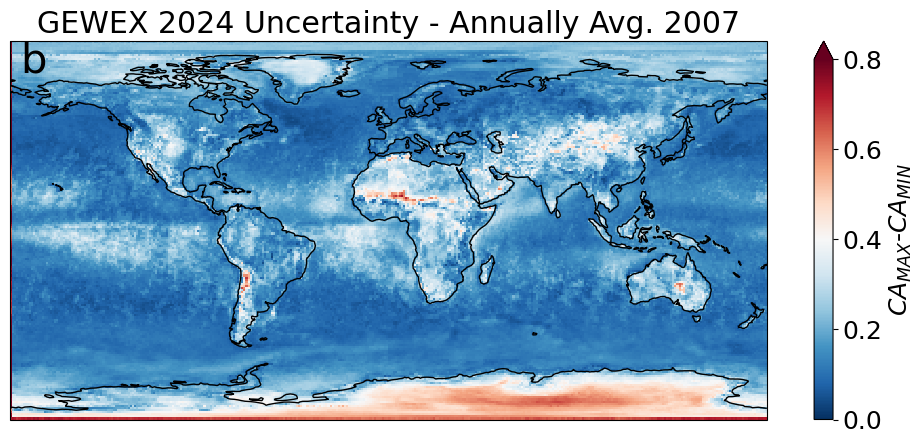

In [125]:
max_min = np.zeros((180,360))
select = [0,1,2,3,4,5,6,7]

for x in range(stack.shape[1]):
    for y in range(stack.shape[2]):
        val = mean_stack_ann_24[:-1,x,y]
        max_min[x,y] = np.nanmax(val)-np.nanmin(val)

fig, axes = plt.subplots(1, 1, figsize=(10, 10), 
                       sharex=True, sharey=True,
                       subplot_kw={'projection': ccrs.PlateCarree()})
img =  axes.pcolormesh(ds_i['longitude'], ds_i['latitude'], max_min,
            transform = ccrs.PlateCarree(), vmin=0, vmax=.8, cmap='RdBu_r')
fig.colorbar(img,shrink=0.4, extend='max',pad=0.05, label=r'$CA_{MAX}$-$CA_{MIN}$')
axes.coastlines()
plt.text(-175, 75, 'b', fontsize=30)

plt.plot()
plt.title('GEWEX 2024 Uncertainty - Annually Avg. 2007')
plt.tight_layout()
plt.savefig('/data/keeling/a/jdnied2/c/GEWEX/gewex_ann_24_spread.png')
# plt.clim((0,1))


['CA_MODIS-CLDPROP_AQU_0130PM_2007.nc' 'CA_MISR_TER_10AM_2007.nc']


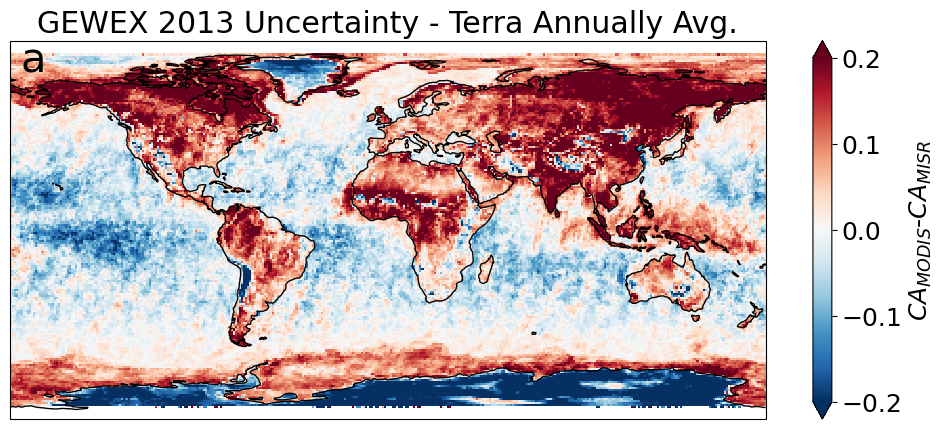

In [10]:
max_min = np.zeros((180,360))
select = [0,1,2,3,4,5,6,7]
# for x in range(stack.shape[1]):
#     for y in range(stack.shape[2]):
#         val = stack_13[select,x,y]
#         max_min[x,y] = np.nanmax(val)-np.nanmin(val)
# mod = stack[4,:,:]
# misr = stack[6,:,:]
mod = mean_stack_ann_13[3,:,:]
misr = mean_stack_ann_13[7,:,:]
print(np.array(files_gewex_2024)[[4,6]])
# diff = np.abs(mod-misr)
diff = mod-misr

fig, axes = plt.subplots(1, 1, figsize=(10, 10), 
                       sharex=True, sharey=True,
                       subplot_kw={'projection': ccrs.PlateCarree()})
img =  axes.pcolormesh(ds_i['longitude'], ds_i['latitude'], diff,
            transform = ccrs.PlateCarree(), vmin=-.2, vmax=.2, cmap='RdBu_r')
fig.colorbar(img,shrink=0.4, extend='both',pad=0.05, label=r'$CA_{MODIS}$-$CA_{MISR}$')
axes.coastlines()
plt.text(-175, 75, 'a', fontsize=30)

plt.plot()
plt.title('GEWEX 2013 Uncertainty - Terra Annually Avg.')
plt.tight_layout()
plt.savefig('/data/keeling/a/jdnied2/c/GEWEX/terra_ann_13_spread.png')
# plt.clim((0,1))


In [139]:
files_gewex_2013[3]

'CA_MODIS-ST_TER_1030AM_2007.nc'

0
MODIS-CLDPROP
1
MODIS-CE-AQU
2
MISR
3
MISR


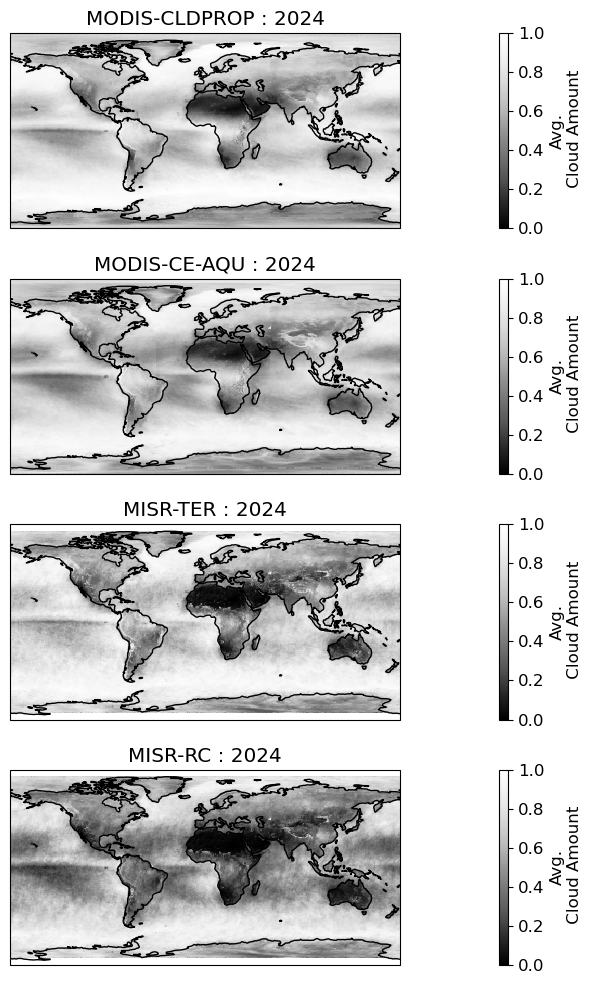

In [50]:
fig, axes = plt.subplots(4, 1, figsize=(20, 10), 
                       sharex=True, sharey=True,
                       subplot_kw={'projection': ccrs.PlateCarree()})

# %matplotlib notebook 
font = {
        'size'   : 12
}
matplotlib.rc('font', **font)



#2013
for i, fname in enumerate(files_gewex_2024[4:]):

    x=i
    print(i)


    dataset_name = fname.split('_')[1]
    if dataset_name == 'MODIS-ST' or dataset_name == 'MODIS-CE':
        dataset_name += '-'+fname.split('_')[2]
    names.append(dataset_name)
    print(dataset_name)
    
    if dataset_name == 'MISR':
        dataset_name += '-'+fname.split('_')[2]
    elif dataset_name =='MODIS-CE':
        dataset_name += 'AQU-'
    elif dataset_name =='AVHRR-ESACCI':
        dataset_name = 'AVHRR-CCI'
    dataset_name += ' : 2024'

    img =  axes[i].pcolormesh(ds_i['longitude'], ds_i['latitude'], mean_stack_ann_24[4+i],
            transform = ccrs.PlateCarree(), vmin=0.0, vmax=1.0, cmap='Greys_r')
    fig.colorbar(img, label='Avg.\n Cloud Amount')
    
    axes[x].coastlines()
    axes[x].set_title(dataset_name)

    

# p.axes.set_global()

# p.axes.coastlines()
plt.tight_layout()
# print(f"MONTH: {MONTH} - ",np.nanmean(avgs_13)-np.nanmean(avgs_24[:-1]))
# print(np.nanmean(avgs_24[:-1]))
# print(np.nanmean(avgs_13))
# # mean_diffs.append(np.nanmean(avgs_13)-np.nanmean(avgs_24[:-1]))
#     print()
plt.savefig('/data/keeling/a/jdnied2/c/GEWEX/appendix_2_datasets_4.png',bbox_inches='tight')
plt.show()